# OCRを用いた文章認識

In [27]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (6):
eng
jpn
jpn_vert
osd
script/Japanese
script/Japanese_vert


In [28]:
from PIL import Image
import pyocr
import numpy as np
import matplotlib.pyplot as plt
import os

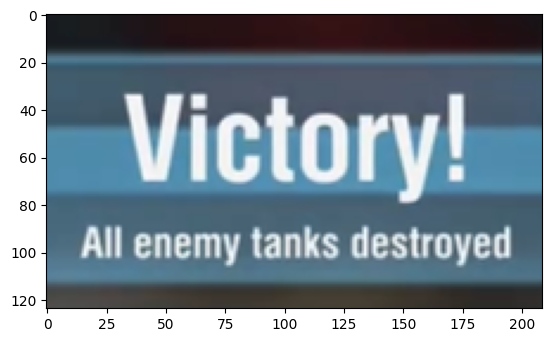

Victory!

All enemy tanks destroyed


In [29]:
file_name = "battle_end.png"

# OCRエンジンを取得
engines = pyocr.get_available_tools()
engine = engines[0]

# OCRエンジンの設定
builder = pyocr.builders.TextBuilder(tesseract_layout = 3)

# 画像を表示
im = Image.open(file_name)
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

# 画像の文字を読み込む
txt = engine.image_to_string(im, lang="eng", builder=builder)
print(txt)

- 下の文字は読むことができたがデカ文字が認識できていない
  - 画像の前処理により精度を向上できるか？

## 画像の前処理
- 文字部分: (R, G, B) = (241, 250, 250)
- 水色部分: (R, G, B) = (79, 140, 172)
- グレー部分: (R, G, B) = (65, 90, 108)

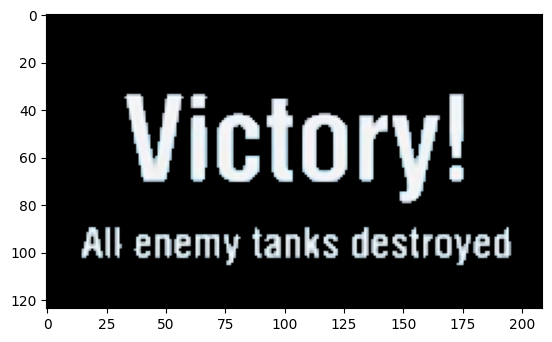

Victory!

All enemy tanks destroyed


In [30]:
im = im.convert('RGB')
size = im.size
im2 = Image.new('RGB', size)

# RGB値のしきい値
border = 160

for x in range(size[0]):
  for y in range(size[1]):
    r, g, b = im.getpixel((x, y))
    if r < border or g < border or b < border:
      r = g = b = 0
    im2.putpixel((x, y), (r, g, b))

im2_list = np.asarray(im2)
plt.imshow(im2_list)
plt.show()

# 画像の文字を読み込む
txt2 = engine.image_to_string(im2, lang="eng", builder=builder)
print(txt2)

(2388, 1668)


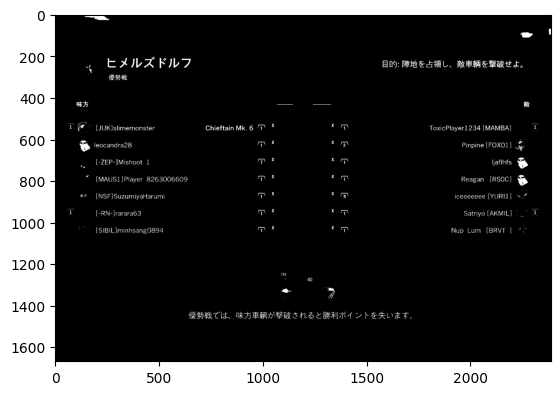

In [31]:
img = Image.open("battle_start.png")
img.convert('RGB')
size = img.size
img2 = Image.new('RGB', size)

print(size)

border = 207

# 画像の二値化関数
def pic2bin(image, image2, border):
  size = image.size
  for x in range(size[0]):
    for y in range(size[1]):
      r, g, b, a = image.getpixel((x, y))   # 読み込む画像によってはアルファ値があったりなかったりする
      if r < border or g < border or b < border:
        r = g = b = 0
      else:
        r = g = b = 255
      image2.putpixel((x, y), (r, g, b))

pic2bin(img, img2, border)

img2_list = np.asarray(img2)
plt.imshow(img2_list)
plt.show()

# 画像の文字を認識
txt = engine.image_to_string(img2, lang="jpn")

In [32]:
print(txt)

でき

の@

ヒメルズドルフ

優勢戦

[JUK]slimemonster

靖  IEfeteclatele4:】

[-ZEP-]Mishoot 1
[MAUS1]Player 8263006609
NSF]SuzumiyaHarumi

-RN-]rarara63

SIBIL]minhsang0894

Chieftain Mk. 6

優勢戦では、味方

目的: 陣地を占領し、敵車輌を撃破せよ。

必 *   X
必 *   X
居 *   X 必
必 *   X 直
必 *   *
必 *   X 直
必 *   X 直

750

・ -40

遇  レ/

E還が撃破されると勝利ポイントを失います。

ToxicPlayer1234 [MAMBA
Pinpine [FOX01]

llaflhfs

Reagan [RS0C

iceeeeeee [YURI1

Satriyo [AKMIL] ^

Nup Lum [BRVT

ののや


In [33]:
print('戦闘開始画面: ', '目的: 陣地を占額し、敵車輌を撃破せよ。' in txt)
print('ヒメルズドルフ: ', 'ヒメルズドルフ' in txt)
print('優勢戦: ', '優勢戦' in txt)

戦闘開始画面:  False
ヒメルズドルフ:  True
優勢戦:  True


## YouTube動画のインポート
- パッケージ `youtube_dl` を使う
  - 遅すぎてお話にならない
- スクショを取る
  - 比較的早い(実時間くらい)
  - どのみち処理するときは画像として扱うので好都合
  - ファイル数が膨大になることがデメリット(?)

In [47]:
import cv2
import pafy
import datetime
import tqdm

# cv2のマルチスレッドを無効化
cv2.setNumThreads(0)

In [40]:
# キャプチャの抽出
def captureVideo(best_url, start, end, date):
  print("\tstart: " + str(start) +", end: " + str(end))
  cap = cv2.VideoCapture(best_url)      # キャプチャに動画を読み込み
  fps = cap.get(cv2.CAP_PROP_FPS)       # 動画FPSの取得

  # for t in tqdm.tqdm(range(start, end)):
  for t in range(start, end):
    # setを使うと遅くなる
    # cap.set(cv2.CAP_PROP_POS_MSEC, t * 1000)  # キャプチャするタイムスタンプを指定(msec)
    ret,frame = cap.read()  # フレームを取得

    # setの代わりにgrabでフレームを読み飛ばす
    for i in range(int(fps)-1):
      ret = cap.grab()

    outfile = date + "_" + str(t) + ".png"
    if ret == True:
      cv2.imwrite(outfile, frame) # PNGに書き出し

    # 終了判定?
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

  # 動画を閉じる
  cap.release()

In [55]:
import mydefs

url = "https://www.youtube.com/watch?v=iUfvSm69Exs&list=PLeUTkfPrOCgxUV3WZeI70DQrFIZaUaVJy&index=1"

In [56]:
mydefs.parallelCapture(url)

Parallelly capturing the video from https://www.youtube.com/watch?v=iUfvSm69Exs&list=PLeUTkfPrOCgxUV3WZeI70DQrFIZaUaVJy&index=1
Retrieving video info...
Done.
initializing multiprocessing...
cpus: 8
process 0 launched
process 1 launched
process 2 launched
process 3 launched
process 4 launched
process 5 launched
process 6 launched
process 7 launched


In [18]:
# キャプチャするYouTube動画のURLを設定
url = "https://www.youtube.com/watch?v=iUfvSm69Exs&list=PLeUTkfPrOCgxUV3WZeI70DQrFIZaUaVJy&index=1"

# ファイル名指定用に時刻を取得
dt = datetime.datetime.now()
date = dt.strftime('%Y-%m-%d_%H-%M-%S')

captureVideo(url, 0, 2, date)

	start: 0, end: 2


### 課題
- キャプチャはとても遅い
  - 並列化でもGoogle Colabは2コアなのでそこまでの高速化は期待できない
  - そもそも`cv2.imwrite()`が並列化非対応の可能性？
    - **cv2の設定でマルチスレッドを無効化することで対応できた**
    - pytorchの[DataLoaderを使う方法](https://blog.shikoan.com/parallel-video-dataloader/#%E4%B8%A6%E5%88%97%E5%8C%96%E5%AF%BE%E5%BF%9C%E5%8F%AF%E8%83%BD%E3%81%AA%E5%8B%95%E7%94%BB%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%82%92%E6%8E%A2%E3%81%99)で対処できるか?
- OCRも遅い
  - 画面を全走査すると結構時間がかかる
  - 切り抜けば高速&高精度
    - 違うアスペクト比・画素数の場合の対処が課題
  - OCRも可能であれば並列化したい
- PIL &leftrightarrow; OCRのやり取り関連
  - PNGで保存しておくと他の機能を実装した際に以降が楽
  - PNG出力のオーバーヘッドがあるので画像出力せずにnparrayなどの形式でやり取りした方が早いはず
    - ただしデータの再利用が難しくなる

## 動画をインポートし、同時にOCRを行う
PNG出力のオーバーヘッドを回避するためにnparrayのまま処理を行う

### 仕様
CV2&PILで動画をインポートし、nparray型でOCRにかける。
このとき画像のトリミング、二値化などの前処理も同時に行うことでOCRの精度向上を図る。
この実装ではテストのため、iPhoneで録画された(2388, 1668)ピクセルの動画を入力として受け取ることとする。

In [14]:
# 動画のキャプチャ&OCRを同時実行
def capture2ocr(best_url, start, end, date):
  cap = cv2.VideoCapture(best_url)      # キャプチャに動画を読み込み
  fps = cap.get(cv2.CAP_PROP_FPS)       # 動画FPSの取得

  # for t in tqdm.tqdm(range(start, end)):
  print("\tstart: " + str(start) +", end: " + str(end))
  for t in range(start, end):
    # setを使うと遅くなる
    # cap.set(cv2.CAP_PROP_POS_MSEC, t * 1000)  # キャプチャするタイムスタンプを指定(msec)
    ret,frame = cap.read()  # フレームを取得

    # 画像の切り抜き

    # 画像の二値化

    # 画像のOCR

    # setの代わりにgrabでフレームを読み飛ばす
    for i in range(int(fps)-1):
      ret = cap.grab()

    outfile = date + "_" + str(t) + ".png"
    if ret == True:
      cv2.imwrite(outfile, frame) # PNGに書き出し

    # 終了判定?
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

  # 動画を閉じる
  cap.release()

SyntaxError: invalid character '￥' (U+FFE5) (1477702827.py, line 19)

In [44]:
from multiprocessing import Process
from time import sleep
from os import getpid, getppid

def f1 (name):
  # 引数を渡せる
  print("Hello {} pid={} ppid={}    sleep 3 sec".format(name, getpid(), getppid()))
  sleep(5)
  print("Good morning", name)

def f2 (*args, **kwargs):
  # 可変長引数、辞書型の引数を渡せる
  print("args=", args, " kwargs=", kwargs)
  print("Hello", kwargs["name"], " pid", getpid(), getppid())
  print("Sleeping... {}s".format(kwargs["tlen"]))
  sleep(kwargs["tlen"])
  print("Good morning", kwargs["name"])

if __name__ == "__main__":
  # サブプロセスを作成
  print(__name__, " pid", getpid())
  p1 = Process(target=f1, args=("Bob",))
  p2 = Process(target=f2, args=("Bob",), kwargs={"name": "Alice", "tlen":10})
  # サブプロセスの開始
  p1.start()
  p2.start()
  print("Processes started.")
  # サブプロセスが終了するまで待機
  p1.join()
  p2.join()
  print("Processes joined.")

__main__  pid 14184
Processes started.
Processes joined.
